### CCAA Python Training Part 2
<p> Date Created: September 8th 2021 </p>
<p> Created By: Analyst 134 </p> 
<p> Data Sources and Examples Located in NFCAPythonTraining.ipynb </p>

In [2]:
# import libraries 
import pandas as pd
import numpy as np 
import os 
import geopandas as gpd
import calmap
import calplot
import matplotlib.pyplot as plt

In [3]:
# Pull data frame from the pervious notebook into this notebook to start building frequency tables for the Chief
%store -r Denver_Crimes_2020
pd.set_option('display.max_rows', 82429)
Denver_Crimes_2020.head()

,year,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,...,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,New_Date,Months,monthName
0,2020,2.020132e+09,2.020000e+15,5707,0,criminal-trespassing,all-other-crimes,2/29/2020 20:15,NaN,2/29/2020 21:16,...,-104.988366,39.754698,6.0,611.0,five-points,1,0,2020-02-29,2,February
1,2020,2.020121e+09,2.020000e+15,5441,0,traffic-accident,traffic-accident,2/25/2020 11:00,NaN,2/25/2020 11:02,...,-104.975266,39.730449,6.0,623.0,capitol-hill,0,1,2020-02-25,2,February
2,2020,2.020298e+08,2.020000e+14,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,1/13/2020 23:00,1/14/2020 5:00,1/14/2020 11:07,...,-105.010399,39.679879,4.0,422.0,college-view-south-platte,1,0,2020-01-14,1,January
3,2020,2.020431e+08,2.020000e+14,5212,1,weapon-by-prev-offender-powpo,all-other-crimes,1/20/2020 2:02,NaN,1/20/2020 3:36,...,-104.988962,39.752955,6.0,611.0,five-points,1,0,2020-01-20,1,January
4,2020,2.020466e+08,2.020000e+14,2303,0,theft-shoplift,larceny,1/21/2020 15:43,NaN,1/21/2020 17:13,...,-104.891880,39.784132,5.0,511.0,stapleton,1,0,2020-01-21,1,January


## Step 3: Create Frequency Tables 2020 Denver Data  Frequency Tables 
<p> <a href="http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html"> How to Create Frequency Tables </a></p> 
<p> Frequency Tables in Python are useful for looking at one variable. If you need to compare two columns, look at pivot tables. Note: piviot tables cant compare columns that have duplicates</p> 
</p>
<p><a href="https://towardsdatascience.com/a-step-by-step-guide-to-pandas-pivot-tables-e0641d0c6c70"> How to Create Pivot Tables </a></p>

### Crime Types

In [4]:
# Total Number of Offenses 
DCrimes = pd.crosstab(Denver_Crimes_2020.OFFENSE_CATEGORY_ID, columns ='count')
# percentages 
DCrimes['percent'] = (DCrimes['count'] / DCrimes['count'].sum()) * 100
# format percentages so a % symbol shows up 
DCrimes['percent'] = DCrimes['percent'].map('{:,.2f}%'.format)
# Call your frequency table by your dataframke variable
DCrimes.sort_values(by='count',ascending=False)

col_0,count,percent
OFFENSE_CATEGORY_ID,,
traffic-accident,14603,17.72%
all-other-crimes,12012,14.57%
theft-from-motor-vehicle,10179,12.35%
larceny,9851,11.95%
public-disorder,9762,11.84%
auto-theft,8273,10.04%
burglary,5141,6.24%
other-crimes-against-persons,3911,4.74%
aggravated-assault,2892,3.51%


### Neighborhoods Crime Rate

In [5]:
# Next Frequency Table Consists of Neighborhoods 
Neighborhoods =  pd.crosstab(Denver_Crimes_2020.NEIGHBORHOOD_ID, columns ='count')
# Get percentages 
Neighborhoods['percent'] = (Neighborhoods['count']/Neighborhoods['count'].sum()) * 100
# Format Percentages 
Neighborhoods['percent'] = Neighborhoods['percent'].map('{:,.2f}%'.format)
# Call dataframe 
Neighborhoods.sort_values(by='count',ascending=False)

col_0,count,percent
NEIGHBORHOOD_ID,,
five-points,4431,5.38%
capitol-hill,3363,4.08%
montbello,2653,3.22%
cbd,2576,3.13%
gateway-green-valley-ranch,2283,2.77%
stapleton,2228,2.70%
union-station,2129,2.58%
lincoln-park,2044,2.48%
baker,2035,2.47%


In [6]:
# Show Top 5 Neighborhoods for Denver Based on number of Crimes Reported. 
Top5 = Denver_Crimes_2020.groupby(['NEIGHBORHOOD_ID']).NEIGHBORHOOD_ID.value_counts().nlargest(5)
Top5

NEIGHBORHOOD_ID             NEIGHBORHOOD_ID           
five-points                 five-points                   4431
capitol-hill                capitol-hill                  3363
montbello                   montbello                     2653
cbd                         cbd                           2576
gateway-green-valley-ranch  gateway-green-valley-ranch    2283
Name: NEIGHBORHOOD_ID, dtype: int64

### Frequency By Month

In [7]:
# Next Frequency Table Consists of Months 
Months =  pd.crosstab(Denver_Crimes_2020.monthName, columns ='count')
# Get percentages 
Months['percent'] = (Months['count']/Months['count'].sum()) * 100
# Format Percentages 
Months['percent'] = Months['percent'].map('{:,.2f}%'.format)
# Call dataframe 
Months.sort_values(by='count',ascending=False)

col_0,count,percent
monthName,,
August,7746,9.40%
January,7666,9.30%
October,7587,9.20%
September,7559,9.17%
July,7500,9.10%
November,6939,8.42%
February,6889,8.36%
May,6699,8.13%
June,6647,8.06%


## Step 4: Using Heat Map Graph To Visualize Data
<p> Using Seaborn Heatmap Calendar </p>
<p><a href='https://github.com/mGalarnyk/Python_Tutorials/blob/master/Request/Heat%20Maps%20using%20Matplotlib%20and%20Seaborn.ipynb'>Github Notebook Example </a></p>

In [8]:
# Step 1: Convert New_Date to a datetime data type 
# Set index to date 
Denver_Crimes_2020['Datetime'] = pd.to_datetime(Denver_Crimes_2020['New_Date'])
Denver_Crimes_2020 = Denver_Crimes_2020.set_index('Datetime')
# Preview Data 
Denver_Crimes_2020.head()

,year,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,...,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,New_Date,Months,monthName
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-02-29,2020,2.020132e+09,2.020000e+15,5707,0,criminal-trespassing,all-other-crimes,2/29/2020 20:15,NaN,2/29/2020 21:16,...,-104.988366,39.754698,6.0,611.0,five-points,1,0,2020-02-29,2,February
2020-02-25,2020,2.020121e+09,2.020000e+15,5441,0,traffic-accident,traffic-accident,2/25/2020 11:00,NaN,2/25/2020 11:02,...,-104.975266,39.730449,6.0,623.0,capitol-hill,0,1,2020-02-25,2,February
2020-01-14,2020,2.020298e+08,2.020000e+14,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,1/13/2020 23:00,1/14/2020 5:00,1/14/2020 11:07,...,-105.010399,39.679879,4.0,422.0,college-view-south-platte,1,0,2020-01-14,1,January
2020-01-20,2020,2.020431e+08,2.020000e+14,5212,1,weapon-by-prev-offender-powpo,all-other-crimes,1/20/2020 2:02,NaN,1/20/2020 3:36,...,-104.988962,39.752955,6.0,611.0,five-points,1,0,2020-01-20,1,January
2020-01-21,2020,2.020466e+08,2.020000e+14,2303,0,theft-shoplift,larceny,1/21/2020 15:43,NaN,1/21/2020 17:13,...,-104.891880,39.784132,5.0,511.0,stapleton,1,0,2020-01-21,1,January


In [10]:
isinstance(Denver_Crimes_2020.index,pd.DatetimeIndex)

True

In [9]:
# values or groupby 
New_Den = Denver_Crimes_2020.value_counts(['NEIGHBORHOOD_ID', 'monthName']).reset_index(name='Count')
New_Den.head()

,NEIGHBORHOOD_ID,monthName,Count
0,five-points,January,554
1,capitol-hill,May,499
2,five-points,August,424
3,stapleton,January,418
4,capitol-hill,June,413


In [10]:
# Create a Pivot Table 
New_Den.pivot('monthName','NEIGHBORHOOD_ID')

Count                                                \
NEIGHBORHOOD_ID athmar-park auraria  baker barnum barnum-west bear-valley   
monthName                                                                   
April                  59.0    23.0   99.0   46.0        25.0        41.0   
August                102.0    56.0  226.0   62.0        42.0        56.0   
December               55.0    12.0  122.0   47.0        30.0        38.0   
February               85.0    70.0  186.0   50.0        25.0        35.0   
January               107.0    71.0  188.0   58.0        46.0        35.0   
July                   77.0    32.0  209.0   61.0        39.0        50.0   
June                   77.0    27.0  152.0   62.0        37.0        46.0   
March                  95.0    54.0  139.0   58.0        25.0        39.0   
May                    78.0    30.0  134.0   62.0        41.0        36.0   
November               72.0    38.0  191.0   69.0        39.0        46.0   
October                87.0    38.0  197.0   64.0        41.0        65.0   
September              83.0    49.0  192.0   80.0        28.0        56.0   

                                                      ...                   \
NEIGHBORHOOD_ID belcaro berkeley capitol-hill    cbd  ... virginia-village   
monthName                                             ...                    
April              15.0     54.0        213.0  176.0  ...             64.0   
August             44.0     70.0        286.0  235.0  ...            103.0   
December           37.0     65.0        177.0  146.0  ...             98.0   
February           44.0     67.0        227.0  274.0  ...             78.0   
January            39.0     79.0        254.0  290.0  ...             75.0   
July               33.0     73.0        305.0  226.0  ...             85.0   
June               51.0     79.0        413.0  172.0  ...             76.0   
March              29.0     61.0        200.0  234.0  ...             72.0   
May                22.0     57.0        499.0  205.0  ...             79.0   
November           43.0     76.0        233.0  175.0  ...             90.0   
October            54.0     63.0        267.0  219.0  ...            105.0   
September          43.0     72.0        289.0  224.0  ...             84.0   

                                                                               \
NEIGHBORHOOD_ID washington-park washington-park-west washington-virginia-vale   
monthName                                                                       
April                      24.0                 37.0                     77.0   
August                     53.0                 67.0                    113.0   
December                   30.0                 61.0                     91.0   
February                   38.0                 61.0                     94.0   
January                    32.0                 55.0                     92.0   
July                       36.0                 64.0                     93.0   
June                       39.0                 76.0                     96.0   
March                      22.0                 47.0                     70.0   
May                        44.0                 48.0                     81.0   
November                   43.0                 57.0                    123.0   
October                    29.0                 83.0                    126.0   
September                  44.0                 73.0                    108.0   

                                                                               
NEIGHBORHOOD_ID wellshire west-colfax west-highland westwood whittier windsor  
monthName                                                                      
April                11.0       115.0          71.0    108.0     36.0    67.0  
August                8.0       148.0          74.0    159.0     47.0    77.0  
December              8.0       157.0          51.0     81.0     41.0    59.0  

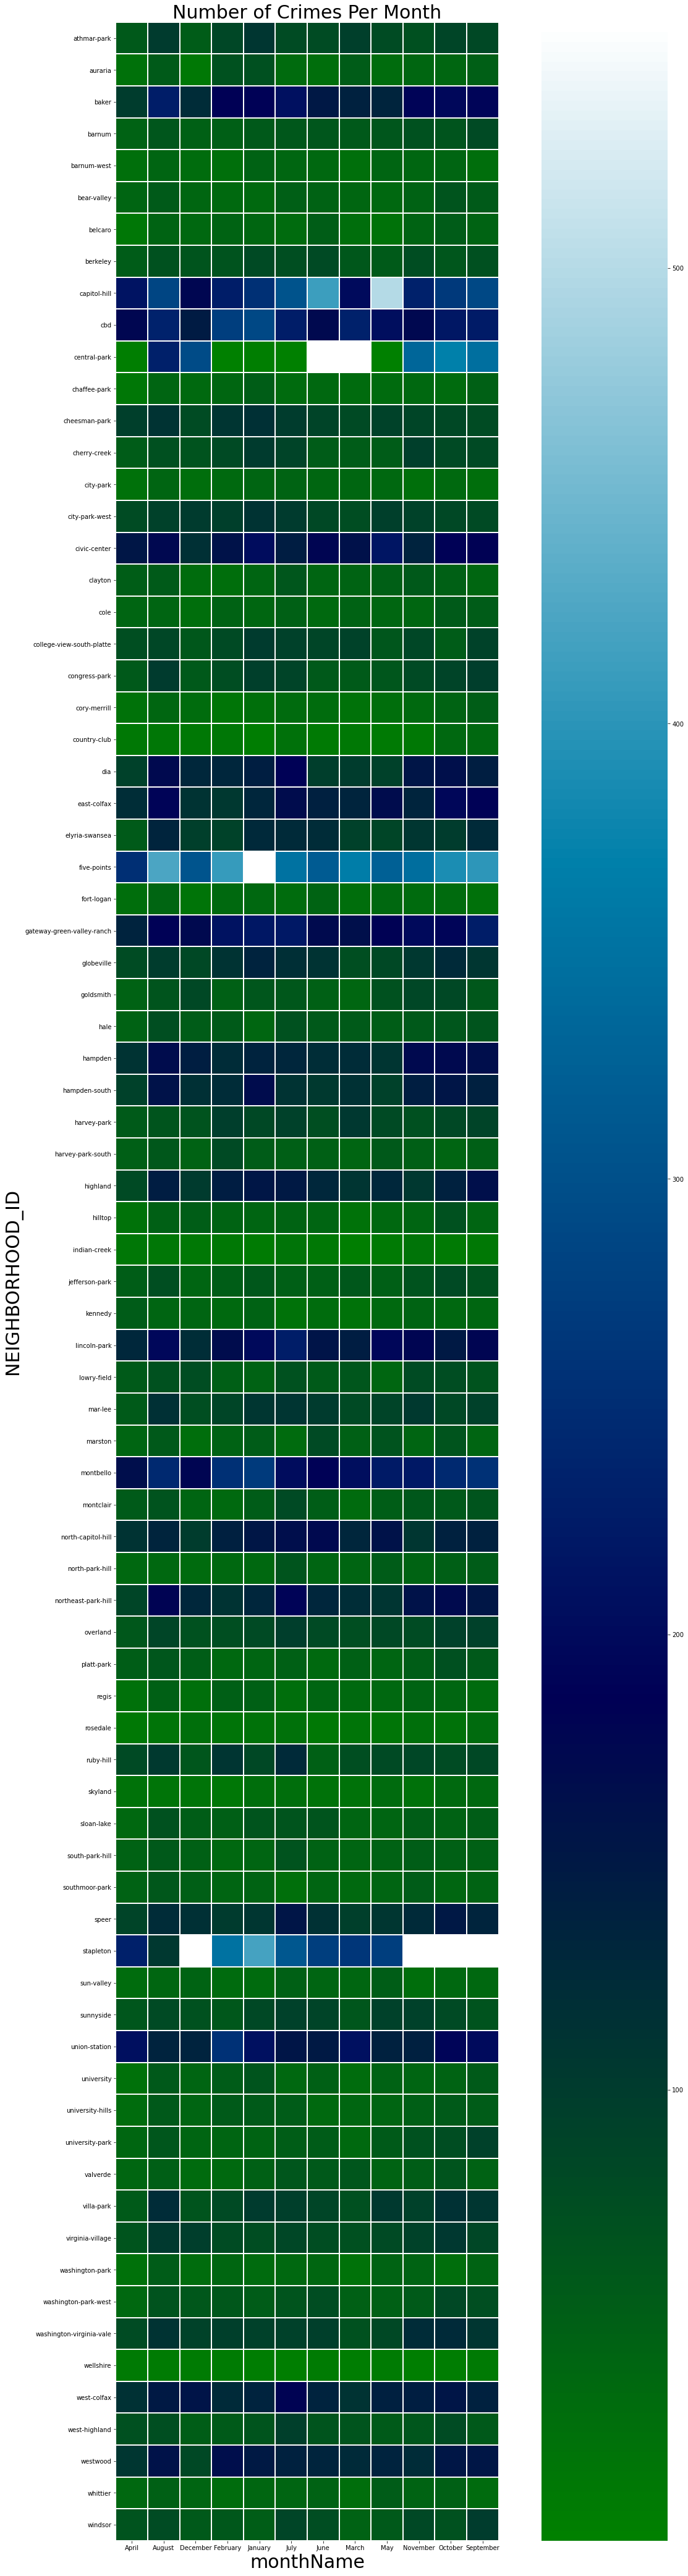

In [11]:
# Lets see if we can create a heat map graph with Seaborn
import seaborn as sns

#build the graph
plt.figure(figsize=(25,75))
data_input = New_Den.pivot('NEIGHBORHOOD_ID','monthName', 'Count')
plt.xlabel('monthName', size = 30)
plt.ylabel('NEIGHBORHOOD_ID', size = 30)
plt.title('Number of Crimes Per Month', size = 30)
sns.heatmap(data_input,annot=False,linewidth=.3, square=True, cmap='ocean');

# Conclusion: 
<p> Key Takeaways: </p>
<p>1.) Python is a useful tool for cleaning and showcasing large datasets </p> 
<p>2.) Python Can be used in addition to Excel. </p> 
<p>3.) Python Can be Automated to create monthly reports </p>
<p>4.) Python Is a good beginner programmer language </p> 

## Contact Info: 
<p> Rachel Stevenson </p> 
<p> Email: rachel.stevenson@state.co.us </p>
<p><a href='https://github.com/Colorado-Dept-of-Public-Safety'> CDPS Github Repository </a></p>